# Phone Error Rates

A notebook that computes phone error rates on some example transcripts

In [2]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [40]:
# do all the imports
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyspch.dtw as dtw
import pyspch.core as Spch
from scipy.spatial.distance import hamming



In [48]:

#r_seg = ['sil', 'b','r','ih','cl','k','s','sil']
# frame representation for r(eference) and o(bservation)
r_fr = ['sil']*9 + ['b']*2 + ['r']*6+ ['ih']*7 + ['cl']*6 +['k']*2 + ['s']*9 + ['sil']*5
o1_fr = ['sil']*6 + ['cl']*3 + ['b','f','v','p','er']+['r']*6 + ['ey','ey','eh','ae']
o1_fr = o1_fr + ['cl']*7 + ['k','t'] +['s']*7 + ['z'] + ['sil']*5

In [49]:
o_fr = o1_fr

len(r_fr), len(o_fr)
hd = 100.*hamming(o_fr,r_fr)
print("Hamming distance between ref and observation frame sequences %.2f%%" %(hd) )

Hamming distance between ref and observation frame sequences 36.96%


### 1. Levenshtein distance between frame label sequences
The Levenshtein distance should find the best alignment between reference and input.  
However, notice that this is a very special case.  The x and y sequences are equally long.
Moreover, if recognition is at least partially good, then a there will be multiple (sometimes long) sequences of matching
symbols and their alignmentis guaranteed to be on the main diagonal.
This mass of zero local distances on the main diagonal will almost automatically lead to a global alignment that simply
follows the main diagonal.   As a frame error rate computed via a simple Hamming distance or via the more involved Levenshtein distance
is highly likely identical !!

Levenshtein Distance:  17 
Frame Error Rate:  36.96% 
Alignment     0    1    2    3    4    5    6    7    8  9   ... 36 37 38 39 40   41  \
x  sil  sil  sil  sil  sil  sil   cl   cl   cl  b  ...  s  s  s  s  z  sil   
y  sil  sil  sil  sil  sil  sil  sil  sil  sil  b  ...  s  s  s  s  s  sil   

    42   43   44   45  
x  sil  sil  sil  sil  
y  sil  sil  sil  sil  

[2 rows x 46 columns]


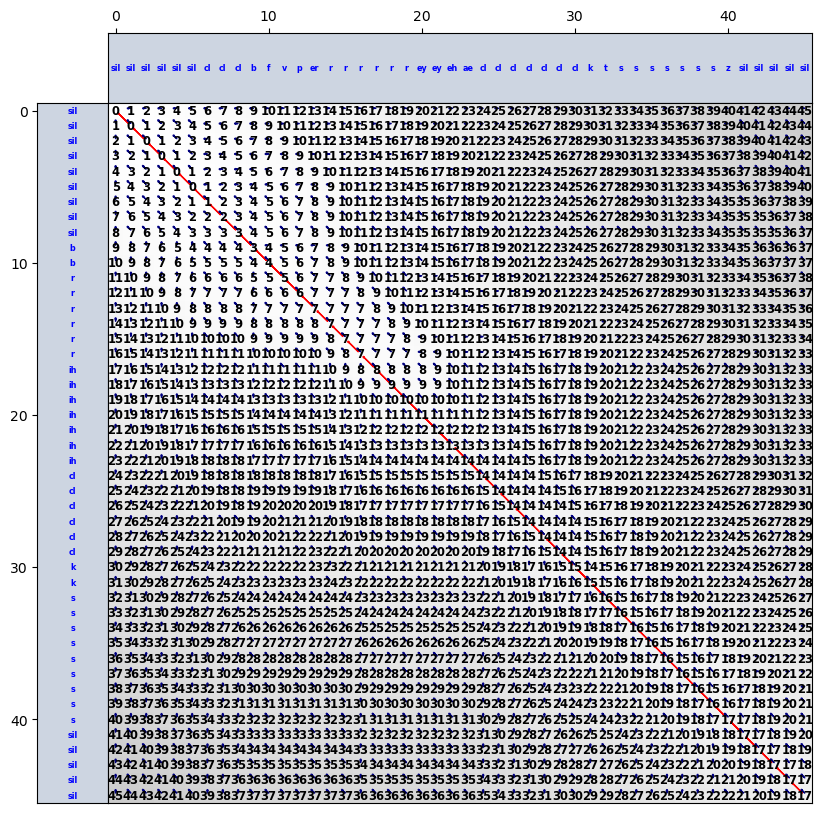

In [51]:
plt_args = {'ftr_scale':.1,'xy_annot':True,'fig_width':10.,
            'xy_args':{'cmap':'Greys','alpha':.2,'text_size':'small','fontweight':'bold','fmt':'{:.0f}'},
            'ftr_args':{'alpha':.2,'cmap':'Blues','text_color':'b','fontweight':'bold'}}
y = np.array(r_fr)
x = np.array(o_fr)
lev_dist,trace,ld,cd,bptrs = dtw.dtw(x,y,trans="LEV",p='hamming',result='details')
print("Levenshtein Distance:  %d " %(lev_dist))
print("Frame Error Rate:  %.2f%% " %(100.*lev_dist/len(y)))
print("Alignment",dtw.align(x,y,trace).T)
display(dtw.plot_trellis(x=x,y=y,xy_mat=cd,trace=trace,bptrs=bptrs,**plt_args))

### 2. Phone Error Rate
For this we assemble identical consecutive frame labels into phone segments.
Then we simply use the obtained phone sequences as reference transcription and result of the speech recognizer output.
Finally we compute a phone error rate by aligning both sequences.

Levenshtein Distance:  10 
Phone Error Rate:  125.00% 
Alignment     0    1  2  3  4  5   6  7   8   9   10  11 12 13 14 15   16
x  sil   cl  b  f  v  p  er  r  ey  eh  ae  cl  k  t  s  z  sil
y  sil  sil  b  b  b  b   b  r   r   r  ih  cl  k  k  s  s  sil


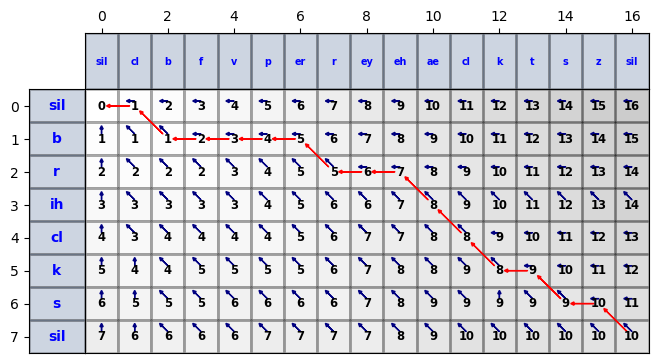

In [53]:
plt_args = {'ftr_scale':.1,'xy_annot':True,'fig_width':8.,
            'xy_args':{'cmap':'Greys','alpha':.2,'text_size':'small','fontweight':'bold','fmt':'{:.0f}'},
            'ftr_args':{'alpha':.2,'cmap':'Blues','text_color':'b','fontweight':'bold'}}
o_s = Spch.lbls2seg(o_fr)
r_s = Spch.lbls2seg(r_fr)
y = np.array(r_s['seg'])
x = np.array(o1_s['seg'])
lev_dist,trace,ld,cd,bptrs = dtw.dtw(x,y,trans="LEV",p='hamming',result='details')
print("Levenshtein Distance:  %d " %(lev_dist))
print("Phone Error Rate:  %.2f%% " %(100.*lev_dist/len(y)))
print("Alignment",dtw.align(x,y,trace).T)
display(dtw.plot_trellis(x=x,y=y,xy_mat=cd,trace=trace,bptrs=bptrs,**plt_args))